In [1]:
import pandas as pd

C:\Users\Shivam Khandelwal\AppData\Local\Temp\ipykernel_1780\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file_path = "Desktop/telco.xlsx"
sheet_name = 'telco_churn'
data = pd.read_excel(file_path, sheet_name=sheet_name)
data.head

<bound method NDFrame.head of      Customer_ID  Gender Married Dependents Multiple_Lines Internet_Service  \
0     8779-QRDMV    Male      No         No             No              Yes   
1     7495-OOKFY  Female     Yes        Yes            Yes              Yes   
2     1658-BYGOY    Male      No        Yes            Yes              Yes   
3     4598-XLKNJ  Female     Yes        Yes             No              Yes   
4     4846-WHAFZ  Female     Yes        Yes            Yes              Yes   
...          ...     ...     ...        ...            ...              ...   
7038  2569-WGERO  Female      No         No             No               No   
7039  6840-RESVB    Male     Yes        Yes            Yes              Yes   
7040  2234-XADUH  Female     Yes        Yes            Yes              Yes   
7041  4801-JZAZL  Female     Yes        Yes             No              Yes   
7042  3186-AJIEK    Male      No         No             No              Yes   

     Internet_Type  A

In [3]:
data.isnull().sum()

Customer_ID                      0
Gender                           0
Married                          0
Dependents                       0
Multiple_Lines                   0
Internet_Service                 0
Internet_Type                 1526
Avg_Monthly_GB_Download          0
Online_Security                  0
Online_Backup                    0
Device_Protection_Plan           0
Premium_Tech_Support             0
Streaming_TV                     0
Streaming_Movies                 0
Streaming_Music                  0
Unlimited_Data                   0
Contract                         0
Paperless_Billing                0
Payment_Method                   0
Monthly_Charge                   0
Total_Charges                    0
Total_Refunds                    0
Total_Extra_Data_Charges         0
Total_LongDistance_Charges       0
Total_Revenue                    0
Satisfaction_Score               0
Customer_Status                  0
ChurnLabel                       0
Churn_Score         

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [5]:
# Drop columns that leak info or are not useful
drop_cols = ['Customer_ID', 'ChurnLabel', 'Churn_Category', 'Churn_Reason']
data_model = data.drop(columns=drop_cols)


In [8]:
# Encode all object-type columns
label_encoders = {}
for column in data_model.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_model[column] = le.fit_transform(data_model[column])
    label_encoders[column] = le

In [9]:
# Define features (X) and target (y)
X = data_model.drop(columns='Customer_Status')
y = data_model['Customer_Status']


In [10]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[370   0  30]
 [  4  93   4]
 [  2   1 905]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       400
           1       0.99      0.92      0.95       101
           2       0.96      1.00      0.98       908

    accuracy                           0.97      1409
   macro avg       0.98      0.95      0.96      1409
weighted avg       0.97      0.97      0.97      1409



In [13]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


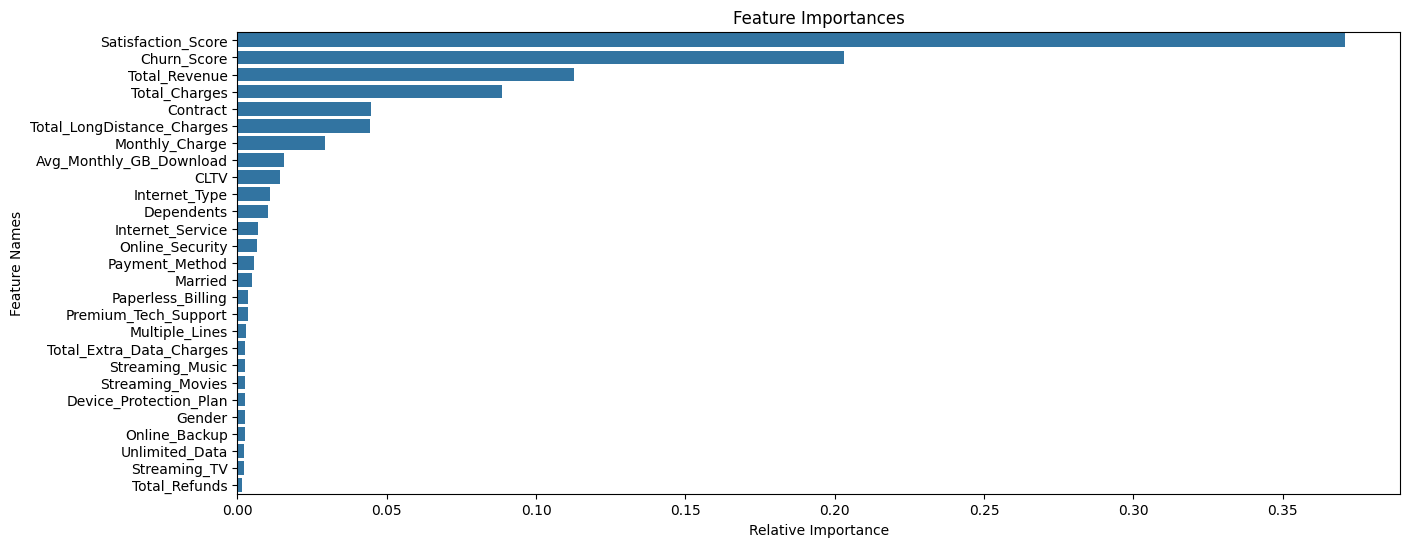

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [16]:
# Define the path to the Joiner Data Excel file
file_path = r"Desktop/telco.xlsx"

# Define the sheet name to read data from
sheet_name = 'telco_join'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'ChurnLabel', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"Desktop/telco_result.csv", index=False)



  Customer_ID  Gender Married Dependents Multiple_Lines Internet_Service  \
0  8779-QRDMV    Male      No         No             No              Yes   
1  7495-OOKFY  Female     Yes        Yes            Yes              Yes   
2  1658-BYGOY    Male      No        Yes            Yes              Yes   
3  4598-XLKNJ  Female     Yes        Yes             No              Yes   
4  4846-WHAFZ  Female     Yes        Yes            Yes              Yes   

  Internet_Type  Avg_Monthly_GB_Download Online_Security Online_Backup  ...  \
0           DSL                        8              No            No  ...   
1   Fiber Optic                       17              No           Yes  ...   
2   Fiber Optic                       52              No            No  ...   
3   Fiber Optic                       12              No           Yes  ...   
4   Fiber Optic                       14              No            No  ...   

  Total_Extra_Data_Charges Total_LongDistance_Charges Total_Revenue 